In this report,

1) Train a KNN Classifier on the MNIST Dataset

2) Use Grid Search with cross-validation to find the best hyperparameter values for your KNN classifier. Focus on optimizing the n_neighbors and weights hyperparameters.

3) Your goal is to achieve at least 97% accuracy on the test set. Use the optimal hyperparameters found in the grid search to fine-tune your model and test its performance on the test set.



<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

# Fine-Tune Your Model

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features (X) and labels (y)
X, y = mnist["data"], mnist["target"]

# Convert target labels to integer type
y = y.astype(int)

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (normalize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train_scaled, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test_scaled)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test Accuracy: {accuracy:.4f}")

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Show classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN Test Accuracy: 0.9465
Confusion Matrix:
[[1318    0    4    4    0    5   11    0    1    0]
 [   0 1587    8    0    2    0    1    1    0    1]
 [  12   16 1298   18    4    4    7   10    8    3]
 [   3    5   16 1361    2   11    1   14   10   10]
 [   0   10   13    1 1212    1    3    4    2   49]
 [   6    2    1   29    7 1198   14    0   11    5]
 [  16    4    4    1    4    9 1357    0    1    0]
 [   3   18    7    4   20    1    0 1394    1   55]
 [  13   17   11   27    6   31    4   12 1220   16]
 [   5    5    9   15   23    4    0   48    5 1306]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.94      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.95      0.94      0.94      1295
           5       0.95      0.94      0.94      1273
           6       0.97

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Try different numbers of neighbors
    'weights': ['uniform', 'distance']  # Test both uniform and distance weights
}

In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# Train the KNN classifier with the best parameters
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with best hyperparameters: {accuracy:.4f}")

Test Accuracy with best hyperparameters: 0.9478


In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1313    1    5    4    0    6   13    0    1    0]
 [   0 1586    8    0    1    0    1    2    1    1]
 [   9   13 1298   20    5    4    7   11    9    4]
 [   1    4   13 1361    3   12    1   16   12   10]
 [   0    8   11    1 1209    3    5    6    2   50]
 [   4    2    1   26    7 1197   17    0   13    6]
 [  15    2    3    1    4    8 1362    0    1    0]
 [   2   16    8    3   16    1    0 1399    1   57]
 [   9   15    9   23    4   33    4   11 1230   19]
 [   5    3    6   13   21    3    0   50    5 1314]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.96      0.99      0.98      1600
           2       0.95      0.94      0.95      1380
           3       0.94      0.95      0.94      1433
           4       0.95      0.93      0.94      1295
           5       0.94      0.94      0.94      1273
           6       0.97      0.98      0.97      

In [ ]:
!pip install -U scikit-learn
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features (X) and labels (y)
X, y = mnist["data"], mnist["target"]

# Convert target labels to integer type
y = y.astype(int)

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (normalize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_clf.fit(X_train_scaled, y_train)

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier here
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features (X) and labels (y)
X, y = mnist["data"], mnist["target"]

# Convert target labels to integer type
y = y.astype(int)

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (normalize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



KNN Test Accuracy: 0.9465
Confusion Matrix:
[[1318    0    4    4    0    5   11    0    1    0]
 [   0 1587    8    0    2    0    1    1    0    1]
 [  12   16 1298   18    4    4    7   10    8    3]
 [   3    5   16 1361    2   11    1   14   10   10]
 [   0   10   13    1 1212    1    3    4    2   49]
 [   6    2    1   29    7 1198   14    0   11    5]
 [  16    4    4    1    4    9 1357    0    1    0]
 [   3   18    7    4   20    1    0 1394    1   55]
 [  13   17   11   27    6   31    4   12 1220   16]
 [   5    5    9   15   23    4    0   48    5 1306]]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = knn_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN Test Accuracy: 0.9465
Confusion Matrix:
[[1318    0    4    4    0    5   11    0    1    0]
 [   0 1587    8    0    2    0    1    1    0    1]
 [  12   16 1298   18    4    4    7   10    8    3]
 [   3    5   16 1361    2   11    1   14   10   10]
 [   0   10   13    1 1212    1    3    4    2   49]
 [   6    2    1   29    7 1198   14    0   11    5]
 [  16    4    4    1    4    9 1357    0    1    0]
 [   3   18    7    4   20    1    0 1394    1   55]
 [  13   17   11   27    6   31    4   12 1220   16]
 [   5    5    9   15   23    4    0   48    5 1306]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.94      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.95      0.94      0.94      1295
           5       0.95      0.94      0.94      1273
           6       0.97

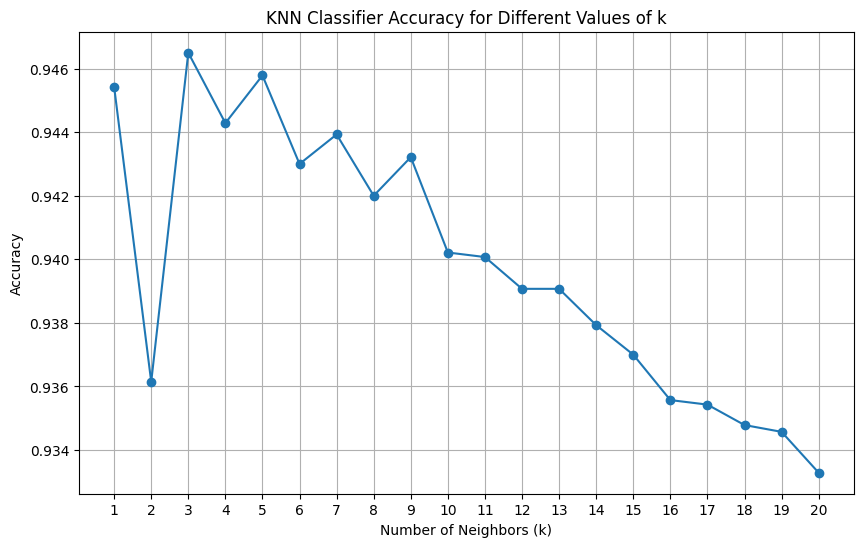

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt # Import the pyplot module for plotting

k_values = range(1, 21)
accuracies = []

# Evaluate accuracy for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the accuracy against the values of k
plt.figure(figsize=(10, 6))  # Now plt is defined and can be used
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Classifier Accuracy for Different Values of k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(np.uint8)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

In [ ]:
# Initialize KNN Classifier
knn = KNeighborsClassifier()

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Score: 0.9697


In [ ]:
# Predict using the best estimator
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9729


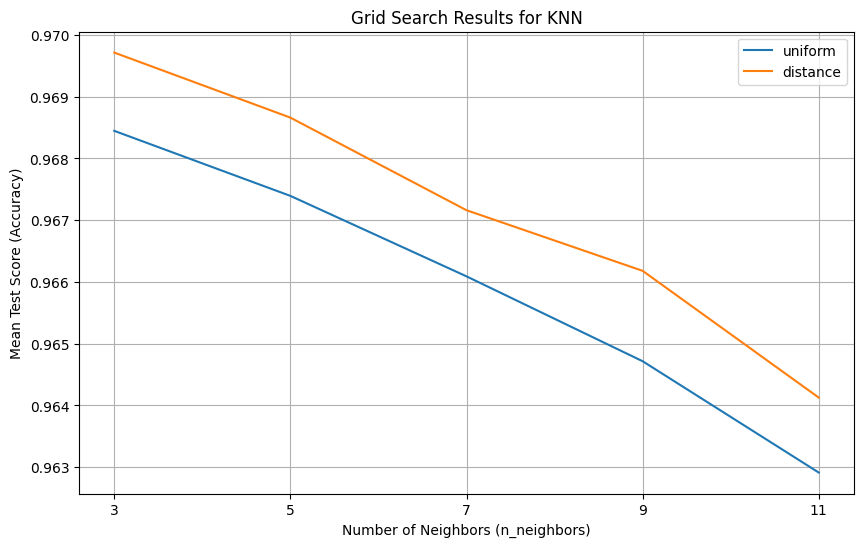

In [ ]:
# Extract grid search results for plotting
results = grid_search.cv_results_

# Plotting
plt.figure(figsize=(10, 6))

# Loop through weights and plot each line
for weight in ['uniform', 'distance']:
    mask = results['param_weights'] == weight
    plt.plot(results['param_n_neighbors'][mask], results['mean_test_score'][mask], label=weight)

plt.title('Grid Search Results for KNN')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Score (Accuracy)')
# Get unique values from the original array before masking
plt.xticks(np.unique(results['param_n_neighbors']))  # Changed line
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features (X) and labels (y)
X, y = mnist["data"], mnist["target"]

# Convert target labels to integer type
y = y.astype(int)

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn = KNeighborsClassifier()

# Set the hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Train the KNN classifier using the optimal hyperparameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with fine-tuned model: {accuracy:.4f}")

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Show the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Accuracy with fine-tuned model: 0.1143
Confusion Matrix:
[[   0 1343    0    0    0    0    0    0    0    0]
 [   0 1600    0    0    0    0    0    0    0    0]
 [   0 1380    0    0    0    0    0    0    0    0]
 [   0 1433    0    0    0    0    0    0    0    0]
 [   0 1295    0    0    0    0    0    0    0    0]
 [   0 1273    0    0    0    0    0    0    0    0]
 [   0 1396    0    0    0    0    0    0    0    0]
 [   0 1503    0    0    0    0    0    0    0    0]
 [   0 1357    0    0    0    0    0    0    0    0]
 [   0 1420    0    0    0    0    0    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1343
           1       0.11      1.00      0.21      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


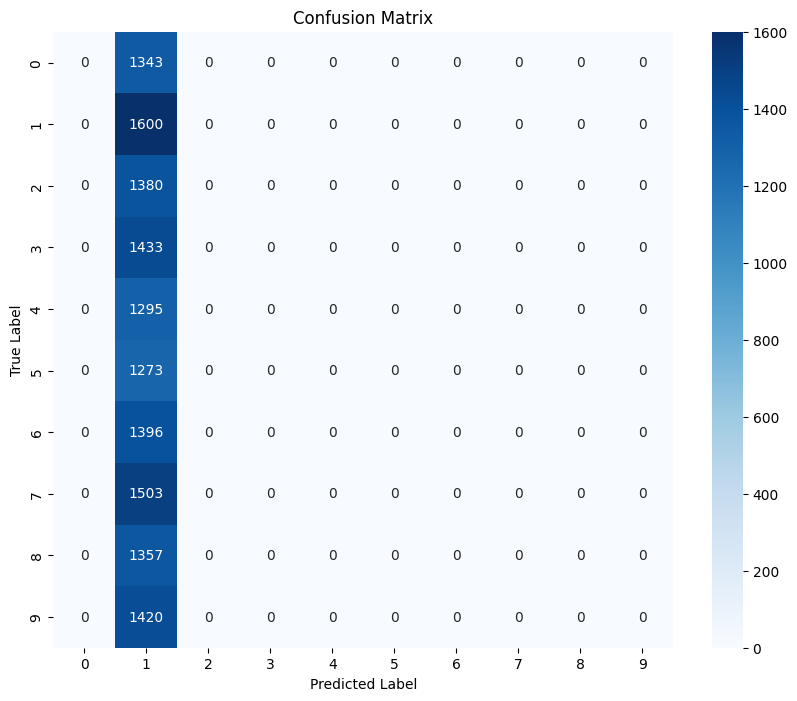

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()